In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(["PRICE"], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
rmse_score = -1 * cross_val_score(rf, X_data, y_target, scoring='neg_root_mean_squared_error', cv=5)
avg_score = np.mean(rmse_score)

print(np.round(rmse_score, 3))
print(np.round(avg_score,3))

[2.808 3.625 4.536 6.799 4.345]
4.423


In [8]:
def get_model_cv_prediction(model, X_data, y_target):
    rmse_score = -1 * cross_val_score(model, X_data, y_target, scoring='neg_root_mean_squared_error', cv=5)
    avg_rmse = np.mean(rmse_score)
    print(model.__class__.__name__)
    print(np.round(avg_rmse,3))

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

DecisionTreeRegressor
5.978
RandomForestRegressor
4.423
GradientBoostingRegressor
4.269
XGBRegressor
4.251
LGBMRegressor
4.646


<AxesSubplot:>

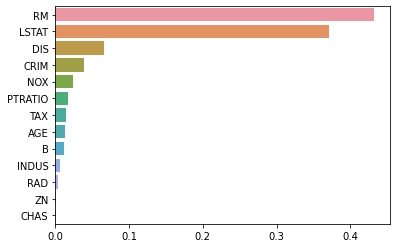

In [10]:
import seaborn as sns
%matplotlib inline
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

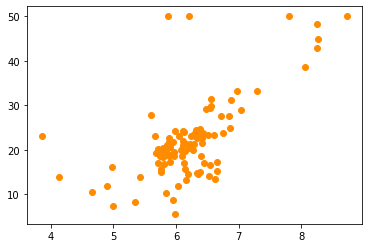

In [12]:
import matplotlib.pyplot as plt
boston_df_sample = boston_df[['RM','PRICE']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
plt.figure()
plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')

In [15]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)
X_feature = boston_df_sample['RM'].values.reshape(-1,1)
y_target = boston_df_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

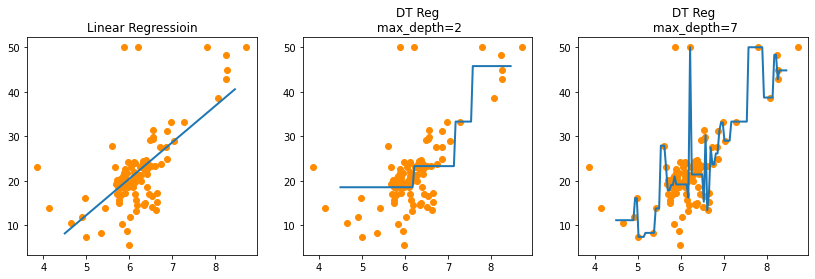

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regressioin')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('DT Reg\n max_depth=2')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='2', linewidth=2)

ax3.set_title('DT Reg\n max_depth=7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='7', linewidth=2)